In [44]:
from pandas import read_excel, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
dataset = read_excel('data.xlsx', "Merge")
dataset.head()

,Дата,Температура,Давление,Влажность,Ветер,День года,День недели,День,Квартал,Месяц,Неделя года,Неделя месяца,Продажи.Итого,Продажи.Требуемый товар,Продажи.Код товара,Продажи.Подразделение
0,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,800,"Масло 82,5% Растительно-Сливочное 180г Белавуш...",15269,VIP
1,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,1100,"Масло 72,5% Растительно-Сливочное ЗМЖ 180г Бе...",15963,VIP
2,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,132,"Масло 72,5% Растительно-Сливочное ЗМЖ 500г Бел...",16961,VIP
3,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,16,Продукт По Технологии Сметаны 15% Главмолоко В...,17026,VIP
4,2022-04-22,9.125,759.0,83.625,2.75,112,4,22,2,4,17,4,323,"Молоко 2,5% Главмолоко Плёнка 450г 20 шт",17029,VIP


In [93]:
ds = dataset.loc[dataset["Продажи.Подразделение"].isin(["Розница"])]
ds = ds.loc[ds["Продажи.Код товара"].isin([23698])]

In [94]:
ds.drop(columns={
    "Дата"
    ,"Давление"
    ,"Ветер"
    #,"День"
    #,"Неделя месяца"
    ,"Продажи.Требуемый товар"
    ,"Продажи.Код товара"
    ,"Продажи.Подразделение"
    }, inplace=True)
ds.corr()

,Температура,Влажность,День года,День недели,День,Квартал,Месяц,Неделя года,Неделя месяца,Продажи.Итого
Температура,1.000000,-0.593357,0.122167,0.032288,0.002298,0.135524,0.124892,0.120090,0.001859,0.559607
Влажность,-0.593357,1.000000,0.002728,-0.034286,0.001261,0.000504,0.001992,0.007672,-0.004980,-0.379733
День года,0.122167,0.002728,1.000000,0.013212,0.061547,0.953609,0.994900,0.999718,0.064548,-0.164629
День недели,0.032288,-0.034286,0.013212,1.000000,0.011312,0.018903,0.012214,-0.006396,-0.171407,-0.042131
День,0.002298,0.001261,0.061547,0.011312,1.000000,-0.038196,-0.039142,0.061438,0.957678,0.001099
Квартал,0.135524,0.000504,0.953609,0.018903,-0.038196,1.000000,0.958761,0.953557,-0.033195,-0.164185
Месяц,0.124892,0.001992,0.994900,0.012214,-0.039142,0.958761,1.000000,0.994641,-0.031965,-0.163325
Неделя года,0.120090,0.007672,0.999718,-0.006396,0.061438,0.953557,0.994641,1.000000,0.068229,-0.167726
Неделя месяца,0.001859,-0.004980,0.064548,-0.171407,0.957678,-0.033195,-0.031965,0.068229,1.000000,-0.023997
Продажи.Итого,0.559607,-0.379733,-0.164629,-0.042131,0.001099,-0.164185,-0.163325,-0.167726,-0.023997,1.000000


In [95]:
trg = ds[['Продажи.Итого','Продажи.Итого']]
trn = ds.drop(['Продажи.Итого','Продажи.Итого'], axis=1)

In [96]:
models = [LinearRegression() # метод наименьших квадратов
            , RandomForestRegressor(n_estimators=100, max_features ='sqrt') # случайный лес
            , KNeighborsRegressor(n_neighbors=6) # метод ближайших соседей
            , SVR(kernel='linear') # метод опорных векторов с линейным ядром
            #, LogisticRegression() # логистическая регрессия
            ]
models

[LinearRegression(),
 RandomForestRegressor(max_features='sqrt'),
 KNeighborsRegressor(n_neighbors=6),
 SVR(kernel='linear')]

In [97]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.4)
Xtrn, Xtest, Ytrn, Ytest

(        Температура  Влажность  День года  День недели  День  Квартал  Месяц  \
 85069     24.375000     50.250        207            0    26        3      7   
 124471     9.000000     67.125         66            4     6        1      3   
 156400    22.500000     73.375        182            1    30        2      6   
 16594     -4.250000     71.125        344            2     9        4     12   
 132666     9.250000     33.125         95            5     4        2      4   
 ...             ...        ...        ...          ...   ...      ...    ...   
 43163     -4.142857     63.000         69            2    10        1      3   
 25587     -3.750000     94.375         11            0    11        1      1   
 41412      1.875000     68.625         63            3     4        1      3   
 125132    14.000000     54.250         69            0     9        1      3   
 148599    15.500000     74.000        155            2     3        2      6   
 
         Неделя года  Неде

In [98]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    print(m)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn.iloc[:,i]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest.iloc[:,0], model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)    

LinearRegression()
RandomForestRegressor(max_features='sqrt')
KNeighborsRegressor(n_neighbors=6)
SVR(kernel='linear')


In [99]:
TestModels

,R2_Y1,R2_Y2
Model,,
LinearRegression,0.378626,0.378626
RandomForestRegressor,0.670503,0.685749
KNeighborsRegressor,0.706716,0.706716
SVR,0.279690,0.279690


<AxesSubplot:title={'center':'R2_Y2'}, xlabel='Model'>

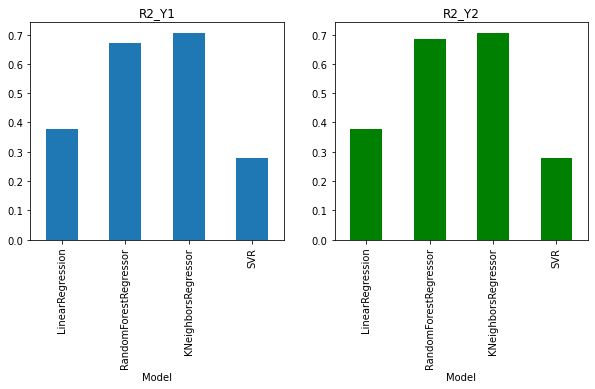

In [100]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')


In [101]:
model = models[1]
model.fit(Xtrn, Ytrn)

RandomForestRegressor(max_features='sqrt')

In [102]:
model.feature_importances_

array([0.26182894, 0.11212219, 0.23607968, 0.03979546, 0.04491416,
       0.03925407, 0.09067305, 0.15608025, 0.01925221])